<a href="https://colab.research.google.com/github/bchou9/eec289Ahw/blob/main/EEC289AHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1 - Import Libraries

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot
from sklearn.feature_extraction import image
import numpy as np
from sklearn.cluster import MiniBatchKMeans
import joblib
import matplotlib.pyplot as plt
import random

In [2]:
# 2 - Define Useful Functions

# Unit normalization of a matrix per row
def unit_norm(x):

  norms = np.linalg.norm(x, axis=1)
  x_unit_norm = np.divide(x, norms.reshape(norms.shape[0],1))

  return x_unit_norm

# Calculate euclidean distance of a matrix by row
def euclidean_dist(x,y):

  eu_distance = np.linalg.norm(x - y, axis=1)

  return eu_distance

# Plot Patch and Centroid
def patch_centrod_plot(patches,centroids,num_plots):

  for i in range(num_plots):

    patch = patches[i,:]
    centroid = centroids[i,:]

    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(patch.reshape(5, 5), cmap='gray')
    ax[0].set_title('Patch')
    ax[1].imshow(centroid.reshape(5, 5), cmap='gray')
    ax[1].set_title('Centroid')

  return

In [3]:
# 3 - Load in MNIST with TF
(train_X, train_y), (test_X, test_y) = mnist.load_data()
'''
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
print(type(train_X))
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()
'''

11490434/11490434 [==============================] - 0s 0us/step


"\nprint('X_train: ' + str(train_X.shape))\nprint('Y_train: ' + str(train_y.shape))\nprint('X_test:  '  + str(test_X.shape))\nprint('Y_test:  '  + str(test_y.shape))\nprint(type(train_X))\nfrom matplotlib import pyplot\nfor i in range(9):\n  pyplot.subplot(330 + 1 + i)\n  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))\n  pyplot.show()\n"

In [4]:
# 4 - Extract patches, shape into (m,25), drop empty patches, normalize to unit norm
patch_list = []
for i in range(train_X.shape[0]):

  patches = image.extract_patches_2d(train_X[i], (5, 5))
  patches_reshape = patches.reshape(patches.shape[0],-1)
  patch_list.append(patches_reshape)

# Convert list into (m,25) numpy array
all_patches = np.concatenate(patch_list, axis=0)

# Remove rows with all zeroes "empty patches"
all_patches = all_patches[~np.all(all_patches == 0, axis=1)]

# Normalize the patch vectors to unit norm
all_patches = unit_norm(all_patches)

In [5]:
# 5 - Train Model - Set bit to False if skipping
train_bit = True
num_clusters = 1000

if train_bit == True:

  kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=100, random_state=42)
  kmeans.fit(all_patches)


  filename = f'kmeans_{num_clusters}_model.joblib'
  joblib.dump(kmeans, filename)


C:\Users\lenovoi7\anaconda3\envs\pythonML\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\lenovoi7\anaconda3\envs\pythonML\lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [6]:
# 6 - Load Model
#filename = 'kmeans_1000.joblib'
#kmeans = joblib.load(filename)

In [7]:
# 7 - Normalize Centroids Unit Norm, Assign Centroids, Find Euclidean Distance (Distortion), and Avg Distortion

# Downsample the dataset
mask = np.random.choice([False, True], len(all_patches), p=[0.6, 0.4])
downsample_patches = all_patches[mask]

# Normalize the centroids
centroids = unit_norm(kmeans.cluster_centers_)

# Find Centroid Assignment
centroid_assignment = kmeans.predict(downsample_patches)

# Assign the centroid vectors
assigned_centroid = centroids[centroid_assignment]

# Find euclidean distance of patches to centroids
eu_distance = euclidean_dist(downsample_patches,assigned_centroid)

# Find avg distortion
avg_distortion = eu_distance.mean()


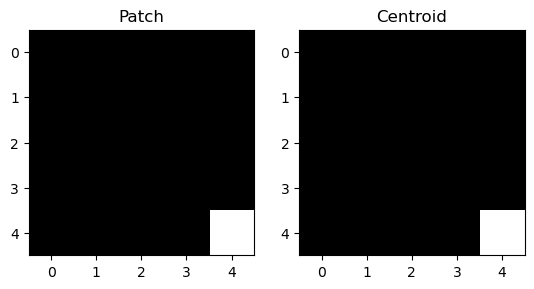

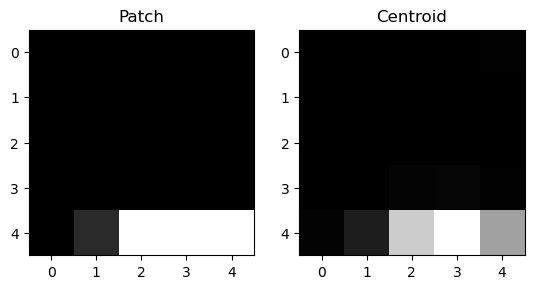

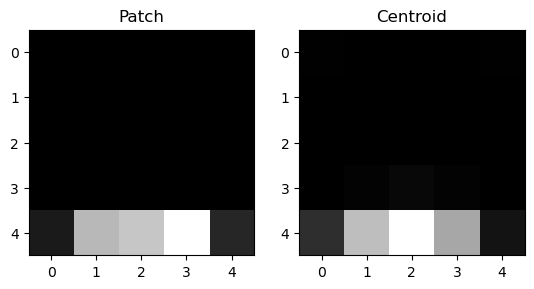

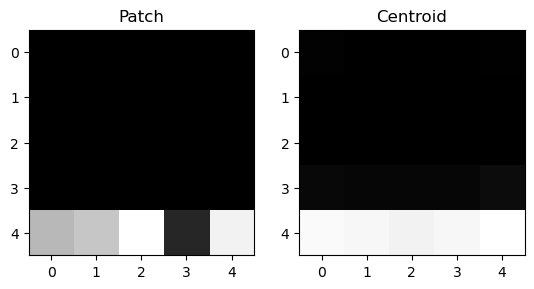

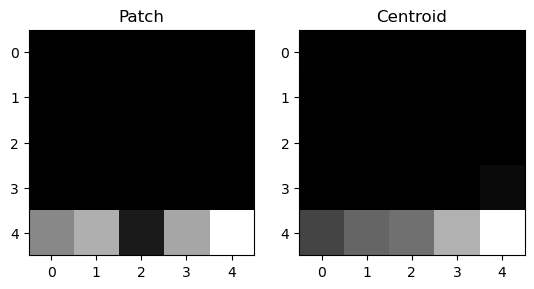

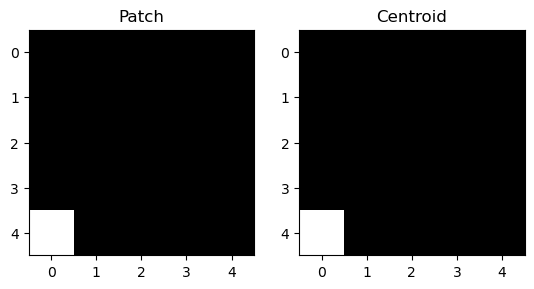

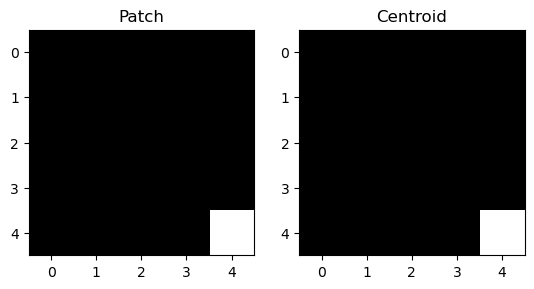

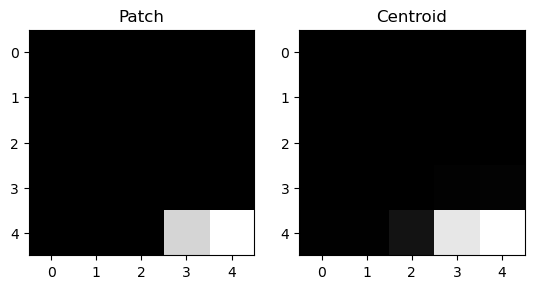

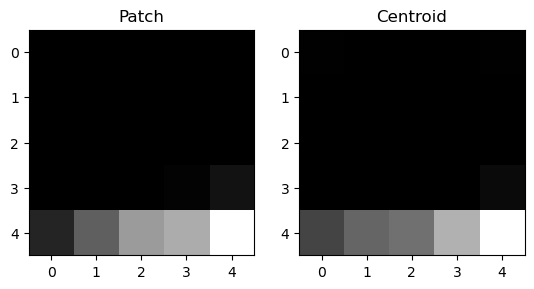

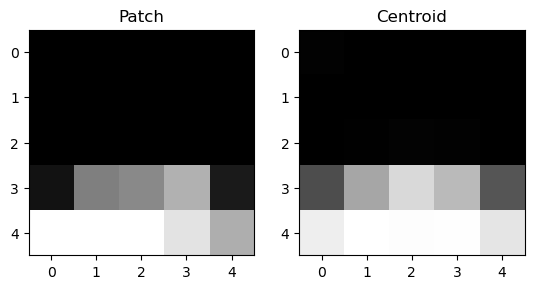

In [8]:
# 8 - Plot Patches with Centroid
num_images = 10
patch_centrod_plot(downsample_patches,assigned_centroid,num_images)

In [9]:
# 9 - Select 3 Random Digits from Test Set to Reconstruct

# Generate a list of three random integers between 1 and 1000
random_numbers = [random.randint(1, 1000) for _ in range(3)]

# Extract patches, shape into (m,25), drop empty patches, normalize to unit norm
patch_list = []

for i in random_numbers:

  patches = image.extract_patches_2d(test_X[i], (5, 5))
  patches = np.nan_to_num(patches, copy=True, nan=0.0, posinf=None, neginf=None)
  patches_reshape = patches.reshape(patches.shape[0],-1)
  patch_list.append(patches_reshape)


# Convert list into (m,25) numpy array
all_patches = np.concatenate(patch_list, axis=0)

# Remove rows with all zeroes "empty patches"
#all_patches = all_patches[~np.all(all_patches == 0, axis=1)]

# Normalize the patch vectors to unit norm
all_patches = unit_norm(all_patches)
all_patches= np.nan_to_num(all_patches, copy=True, nan=0.0, posinf=None, neginf=None)

# Find Centroid Assignment
centroid_assignment = kmeans.predict(all_patches)

# Assign the centroid vectors
assigned_centroid = centroids[centroid_assignment]

# Find euclidean distance of patches to centroids
eu_distance = euclidean_dist(all_patches,assigned_centroid)


C:\Users\lenovoi7\AppData\Local\Temp\ipykernel_3436\1537037438.py:7: RuntimeWarning: invalid value encountered in divide
  x_unit_norm = np.divide(x, norms.reshape(norms.shape[0],1))


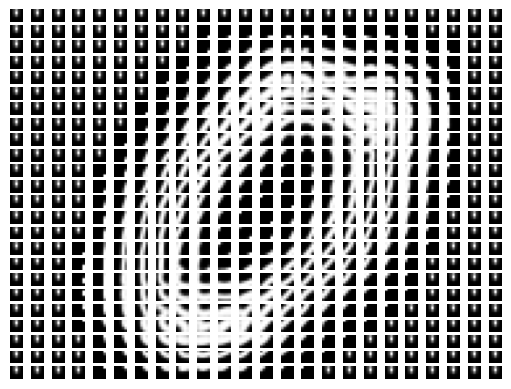

In [10]:
# 10 - Reconstruct the image of all 5x5 patches

image_shape = all_patches.shape[0] / 3
height_width = int(np.sqrt(image_shape))
fig, ax = plt.subplots(height_width, height_width)

for i in range(height_width):
  for j in range(height_width):
    centroid = assigned_centroid[i*height_width+j,:].reshape(5,5)
    ax[i,j].imshow(centroid, cmap='gray')
    ax[i,j].axis('off')

plt.show()



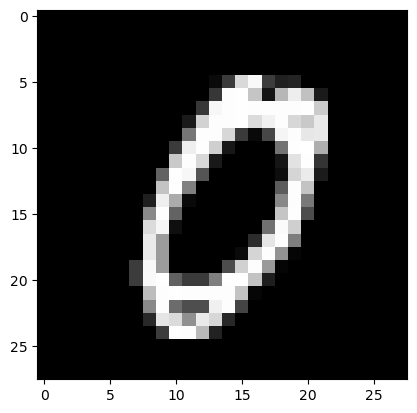

In [11]:
# 11 - Plot Original Image
plt.imshow(test_X[random_numbers[0]], cmap=pyplot.get_cmap('gray'))
plt.show()

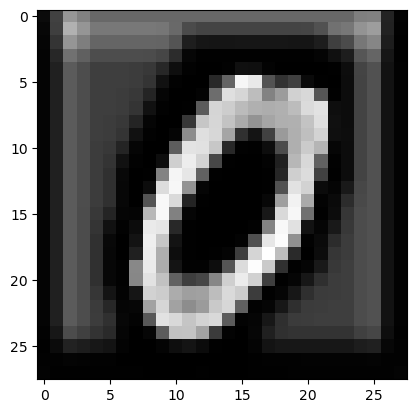

In [12]:
# Plot Nice Reconstruction


# Obtain the patch list to reconstruct image
patch_list = []
this_centroid = assigned_centroid[:576,:]

for i in range(this_centroid.shape[0]):

  this_patch = this_centroid[i,:].reshape(5,5)

  patch_list.append(this_patch)

reconstructed_patches = np.stack(patch_list)

reconstructed_digit =  image.reconstruct_from_patches_2d(reconstructed_patches, (28, 28))
reconstructed_digit.shape

plt.imshow(reconstructed_digit, cmap=pyplot.get_cmap('gray'))
plt.show()